In [1]:
# Four observations or inferences that can be made are: 
# 1) Capomulin and Ramicane were used visibly more often than the rest of the treatment/drug regimens, as can be
# seen in the bar plot below In [7]. This may very well be because the Mean Tumor Volume for both of these were near 40
# millimeters cubed, while the other eight regimens' Mean Tumor Volume hovered above 50 mm cubed. It was more
# successful, and I suppose that because of that, it warranted more uses.
# 2) There were roughly (give or take two percentage points) the same number of female and male mice. This must have
# been purposely done, so as to not introduce a potentially confounding variable into Tumor Volume. Sex could have
# been a factor in this, but it was made a non-factor.
# 3) For mouse s185, the tumor volume almost halved over the entire timepoint. This is for one mouse, but this must
# have been very promising to see.
# 4) In order for us to say that there is a 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [3]:
# The below is combining the "mouse_metadata" and "study_results" datasets 
# (cont.) into one DataFrame called "laboratory_data".
laboratory_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# (cont.) and SEM of the tumor volume for each regimen.
# "groupby" the "Drug Regimen"...
laboratory_data_mean = laboratory_data.groupby(["Drug Regimen"]).mean()
laboratory_data_median = laboratory_data.groupby(["Drug Regimen"]).median()
laboratory_data_variance = laboratory_data.groupby(["Drug Regimen"]).var()
laboratory_data_standard_deviation = laboratory_data.groupby(["Drug Regimen"]).std()
laboratory_data_standard_SEM = laboratory_data.groupby(["Drug Regimen"]).sem()

In [5]:
# The below is concatenating multiple Series into a new DataFrame (i.e., the summary statistics table).
summary_statistics_table = pd.concat([laboratory_data_mean["Tumor Volume (mm3)"], 
                                      laboratory_data_median["Tumor Volume (mm3)"], 
                                      laboratory_data_variance["Tumor Volume (mm3)"], 
                                      laboratory_data_standard_deviation["Tumor Volume (mm3)"], 
                                      laboratory_data_standard_SEM["Tumor Volume (mm3)"]], axis = 1)

In [6]:
# Rename the columns so that what we are looking at is more clear.
summary_statistics_table.columns = ["Mean Tumor Volume (mm3)", 
                                    "Median Tumor Volume (mm3)", 
                                    "Tumor Volume (mm3) - Variance", 
                                    "Tumor Volume (mm3) - Standard Deviation", 
                                    "Tumor Volume (mm3) - SEM"]
# Print...
summary_statistics_table

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume (mm3) - Variance,Tumor Volume (mm3) - Standard Deviation,Tumor Volume (mm3) - SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Number of Data Points')

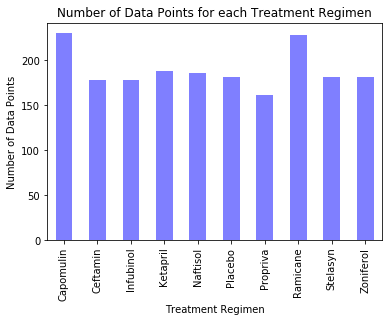

In [7]:
# Generate a bar plot showing the number of data points for each treatment regimen using pandas.
# We need the number of instances that the "Drug Regimen" was used.
laboratory_data_count = laboratory_data.groupby(["Drug Regimen"]).count()
# We just need the "Mouse ID" column, so "drop" the rest.
dropped_laboratory_data_count = laboratory_data_count.drop(["Sex", 
                                                            "Age_months", 
                                                            "Weight (g)", 
                                                            "Timepoint", 
                                                            "Tumor Volume (mm3)", 
                                                            "Metastatic Sites"], axis = 1)
# "alpha" means opacity; we want our pandas plot to look identical to our matplotlib plot...
pymaceuticals_bar_plot = dropped_laboratory_data_count.plot(kind = "bar", 
                                                            title = "Number of Data Points for each Treatment Regimen", 
                                                            legend = False, 
                                                            alpha = 0.5, 
                                                            color = "b", 
                                                            width = 0.5)
# Axis labels for the plot...
pymaceuticals_bar_plot.set_xlabel("Treatment Regimen")
pymaceuticals_bar_plot.set_ylabel("Number of Data Points")

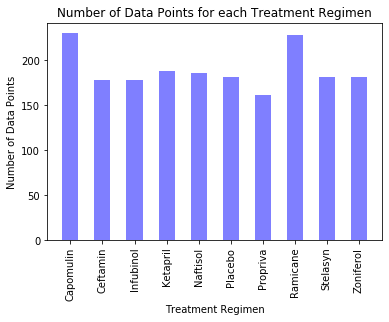

In [8]:
# Generate a bar plot showing the number of data points for each treatment regimen using pyplot.
# Create an array that contains the instances.
mouse_id = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
x_axis = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# Create a graph based upon the two lists that we have created.
plt.bar(x_axis, mouse_id, color = "b", alpha = 0.5, align = "center", width = 0.5)
# Tell matplotlib where we would like to place each of our x axis headers.
tick_locations = [value for value in x_axis]
drug_regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", 
                "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
plt.xticks(tick_locations, drug_regimen, rotation = "vertical")
# Give our plot axis labels and a title.
plt.xlabel("Treatment Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points for each Treatment Regimen")
# Print...
plt.show()

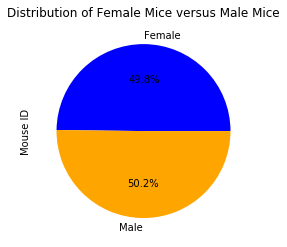

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# "groupby" the "Sex" and count the number of female and male mice
female_male_distribution = laboratory_data.groupby(["Sex"]).nunique()
# Delete the unnecessary columns
del female_male_distribution["Drug Regimen"]
del female_male_distribution["Sex"]
del female_male_distribution["Age_months"]
del female_male_distribution["Weight (g)"]
del female_male_distribution["Timepoint"]
del female_male_distribution["Tumor Volume (mm3)"]
del female_male_distribution["Metastatic Sites"]
# Show percentages because the values are very close; we also want our pie plot from pandas to look identical to
# (cont.) the pie plot from matplotlib.
pymaceuticals_pie_plot = female_male_distribution.plot.pie(y = "Mouse ID", 
                                                           autopct = '%1.1f%%', 
                                                           legend = False, 
                                                           title = "Distribution of Female Mice versus Male Mice", 
                                                           colors = ["blue", "orange"])

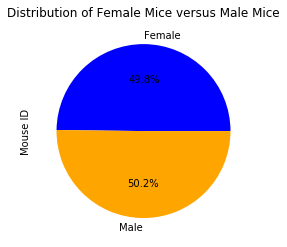

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot.
# Labels for the sections of our pie chart...
labels = ["Female", "Male"]
# The values of each section of the pie chart...
sizes = [124, 125]
# The colors of each section of the pie chart...
colors = ["blue", "orange"]
# Creates the pie chart based upon the values above...
plt.pie(sizes, labels = labels, colors = colors, autopct = "%1.1f%%")
plt.title("Distribution of Female Mice versus Male Mice")
plt.ylabel("Mouse ID")
plt.show()

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
final_tumor_volume_df = laboratory_data.set_index(["Drug Regimen"])
capomulin = final_tumor_volume_df.loc["Capomulin", "Tumor Volume (mm3)"]
ramicane = final_tumor_volume_df.loc["Ramicane", "Tumor Volume (mm3)"]
infubinol = final_tumor_volume_df.loc["Infubinol", "Tumor Volume (mm3)"]
ceftamin = final_tumor_volume_df.loc["Ceftamin", "Tumor Volume (mm3)"]
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# The data is in a DataFrame, so we use pandas to give us our quartile calculations.
# 1st, Capomulin... Its lower bound equals 26.714, but its minimum value is less, at 23.343; there may be outliers.
capomulin_min = final_tumor_volume_df.loc["Capomulin", "Tumor Volume (mm3)"].min()
capomulin_max = final_tumor_volume_df.loc["Capomulin", "Tumor Volume (mm3)"].max()
capomulin_quartiles = capomulin.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
# 2nd, Ramicane... Its lower bound equals 24.186, but its minimum value is less, at 22.050; there may be outliers.
ramicane_min = final_tumor_volume_df.loc["Ramicane", "Tumor Volume (mm3)"].min()
ramicane_max = final_tumor_volume_df.loc["Ramicane", "Tumor Volume (mm3)"].max()
ramicane_quartiles = ramicane.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
# 3rd, Infubinol... There are no potential outliers.
infubinol_min = final_tumor_volume_df.loc["Infubinol", "Tumor Volume (mm3)"].min()
infubinol_max = final_tumor_volume_df.loc["Infubinol", "Tumor Volume (mm3)"].max()
infubinol_quartiles = infubinol.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
# 4th, Ceftamin... There are no potential outliers.
ceftamin_min = final_tumor_volume_df.loc["Ceftamin", "Tumor Volume (mm3)"].min()
ceftamin_max = final_tumor_volume_df.loc["Ceftamin", "Tumor Volume (mm3)"].max()
ceftamin_quartiles = ceftamin.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

In [12]:
print(f"The IQR for Capomulin is: {round(capomulin_iqr, 3)}")
print(f"The lower bound for Capomulin is {round(capomulin_lower_bound, 3)}; values below this may be outliers.")
print(f"The upper bound for Capomulin is {round(capomulin_upper_bound, 3)}; values above this may be outliers.""\n")

print(f"The IQR for Ramicane is: {round(ramicane_iqr, 3)}")
print(f"The lower bound for Ramicane is {round(ramicane_lower_bound, 3)}; values below this may be outliers.")
print(f"The upper bound for Ramicane is {round(ramicane_upper_bound, 3)}; values above this may be outliers.""\n")

print(f"The IQR for Infubinol is: {round(infubinol_iqr, 3)}")
print(f"The lower bound for Infubinol is {round(infubinol_lower_bound, 3)}; values below this may be outliers.")
print(f"The upper bound for Infubinol is {round(infubinol_upper_bound, 3)}; values above this may be outliers.""\n")

print(f"The IQR for Ceftamin is: {round(ceftamin_iqr, 3)}")
print(f"The lower bound for Ceftamin is {round(ceftamin_lower_bound, 3)}; values below this may be outliers.")
print(f"The upper bound for Ceftamin is {round(ceftamin_upper_bound, 3)}; values above this may be outliers.")

The IQR for Capomulin is: 7.314
The lower bound for Capomulin is 26.715; values below this may be outliers.
The upper bound for Capomulin is 55.971; values above this may be outliers.

The IQR for Ramicane is: 8.325
The lower bound for Ramicane is 24.187; values below this may be outliers.
The upper bound for Ramicane is 57.488; values above this may be outliers.

The IQR for Infubinol is: 10.002
The lower bound for Infubinol is 32.309; values below this may be outliers.
The upper bound for Infubinol is 72.318; values above this may be outliers.

The IQR for Ceftamin is: 9.593
The lower bound for Ceftamin is 32.819; values below this may be outliers.
The upper bound for Ceftamin is 71.191; values above this may be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x1a19216750>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1920d8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a19206390>,
 'medians': [<matplotlib.lines.Line2D at 0x1a1921bc10>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a19216d10>,
 'means': []}

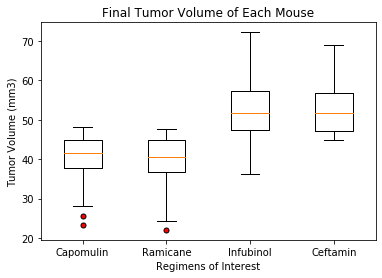

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest.
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Regimens of Interest")
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
# Highlight any potential outliers in the plot by changing their color and style.
flierprops_capomulin = dict(marker = ".", markerfacecolor = "red", markersize = 10, markeredgecolor = "black")
# Combine our data into one variable to hold the four regimens of interest.
four_regimens = [capomulin, ramicane, infubinol, ceftamin]
ax1.boxplot(four_regimens, flierprops = flierprops_capomulin)

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin.
line_plot_df = final_tumor_volume_df.loc["Capomulin", :].drop(columns = ["Sex", "Age_months", 
                                                        "Weight (g)", "Metastatic Sites"])

In [15]:
# This is for a single mouse; I chose "s185".
x_axis = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
y_axis = [45.000000, 43.878496, 37.614948, 38.177232, 36.866876, 
          33.949940, 32.959671, 28.328531, 25.472143, 23.343598]

Text(0.5, 1.0, 'Tumor Volume over each Timepoint for s185')

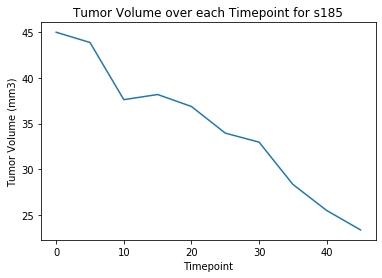

In [16]:
# Create a graph based upon the two lists that we have created.
plt.plot(x_axis, y_axis)
# Give our graph axis labels and a title.
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume over each Timepoint for s185")

The correlation between both factors is 0.53.


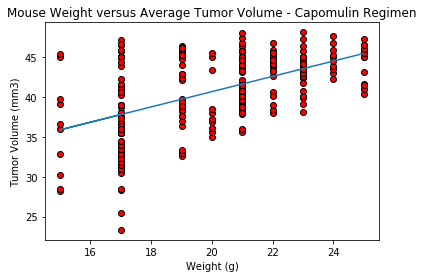

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen.
scatter_plot_df = final_tumor_volume_df.loc["Capomulin", :].drop(columns = ["Mouse ID", 
                                                                            "Sex", 
                                                                            "Age_months", 
                                                                            "Timepoint", 
                                                                            "Metastatic Sites"])
mouse_weight = scatter_plot_df.loc[:, "Weight (g)"].reset_index().drop(columns = ["Drug Regimen"])
# These are still DataFrames, not lists; so, they must be converted.
mouse_weight_list = mouse_weight.values.tolist()
tumor_volume = scatter_plot_df.loc[:, "Tumor Volume (mm3)"].reset_index().drop(columns = ["Drug Regimen"])
tumor_volume_list = tumor_volume.values.tolist()
# Tell matplotlib to create a scatter plot based upon the above data.
plt.scatter(mouse_weight_list, tumor_volume_list, marker = "o", facecolors = "red", edgecolors = "black")
# Create a title, x label, and y label for our chart.
plt.title("Mouse Weight versus Average Tumor Volume - Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
# Calculate the correlation coefficient and linear regression model
# (cont.) for mouse weight and average tumor volume for the Capomulin regimen
x = scatter_plot_df.loc[:, "Weight (g)"]
y = scatter_plot_df.loc[:, "Tumor Volume (mm3)"]
correlation_coefficient = st.pearsonr(x, y)
print(f"The correlation between both factors is {round(correlation_coefficient[0],2)}.")
# Plot the linear regression model on top of the previous scatter plot.
y_slope, y_int, y_r, y_p, y_std_err = st.linregress(x, y)
y_fit = y_slope * x + y_int
plt.plot(x,y_fit)